<font size=5>Machine Learning Model Validation Workshop, 2022</font>

<font size=4 color=blue>Session 1: Machine Learning Interpretability</font>

By Aijun Zhang, June 29, 2022

This demo (based on BikeSharing data) covers: 

- Intro to PiML and Data Dashboard 

- Post-hoc Explainability Tools/Puzzles

- FANOVA-Interpretable Models: EBM and GAMI-Net

Today we mainly demonstrate the use of PiML through its low-code interface. In the forthcoming series of PiML tutorials, we will provide the automatic run through calling high-code APIs. 

# Initialize PiML Experiment

1. Run `!pip install piml` to install the latest version of PiML.
2. In Google Colab, we need restart the runtime in order to use newly installed version.
3. Initilaize a new experiment by `piml.Experiment()`

In [ ]:
!pip install PiML

In [ ]:
#!pip show PiML

In [ ]:
from piml import Experiment
exp = Experiment()

# Load and Prepare Data

In [ ]:
# Choose BikeSharing
exp.data_loader()

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

In [ ]:
# Exclude these features one-by-one: "season", "workingday", "atemp" (highly correlated with others)
exp.data_summary()

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

HTML(value='<link rel="stylesheet" href="//stackpath.bootstrapcdn.com/font-awesome/4.7.0/css/font-awesome.min.…

In [ ]:
exp.data_prepare()

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

Output()

In [ ]:
exp.eda()

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

# Post-hoc Explainability Tools/Puzzles

## Example 1: XGBoost Model

In [ ]:
import xgboost as xgb
clf = xgb.XGBRegressor(max_depth=7, n_estimators=500)

pipeline = exp.make_pipeline(model=clf, name='XGBoost')
pipeline.fit()
exp.register(pipeline=pipeline)

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

HTML(value="<p class='notification info'>Register XGBoost Done</p>")

In [ ]:
# Check model performance
exp.model_diagnose(model="XGBoost", show='accuracy_result')

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

,,MSE,MAE,R2
0,Train,0.000047,0.004484,0.998625
1,Test,0.001905,0.027622,0.945735
2,Gap,0.001857,0.023138,-0.052891


HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

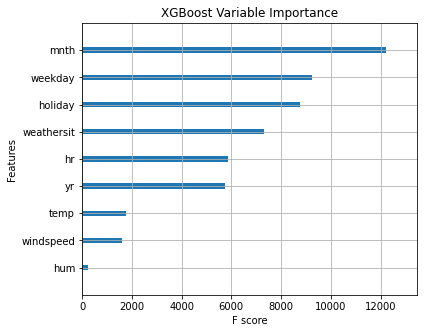

In [ ]:
# Tree-based Variable Importance
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (6, 5)

_, _, _, _, feature_names, _ = exp.get_clean_data()
clf.get_booster().feature_names = feature_names
xgb.plot_importance(clf, title="XGBoost Variable Importance", show_values=False)
plt.show()

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

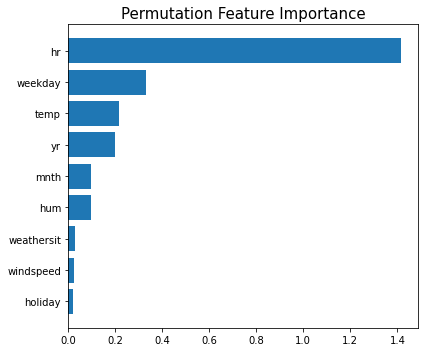

In [ ]:
# Permutation Feature Importance
exp.model_explain(model='XGBoost', show='global_pfi', figsize=(6,5))

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

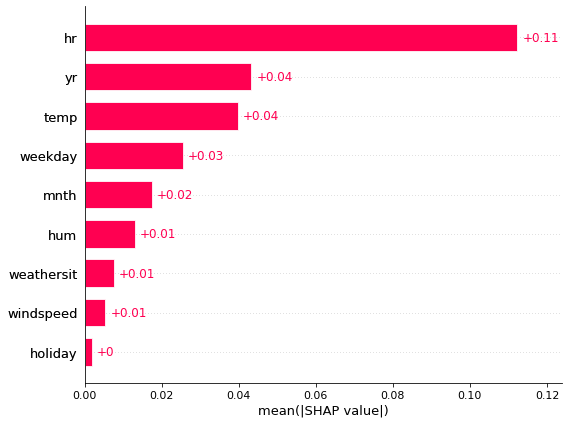

In [ ]:
# SHAP Feature Importance
exp.model_explain(model='XGBoost', show='global_shap_fi', sample_size=500)

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

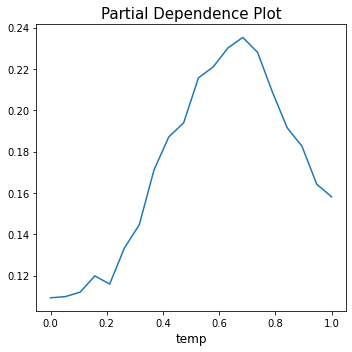

In [ ]:
# PDP 
exp.model_explain(model='XGBoost', show='global_pdp', uni_feature='temp', figsize=(5,5))

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

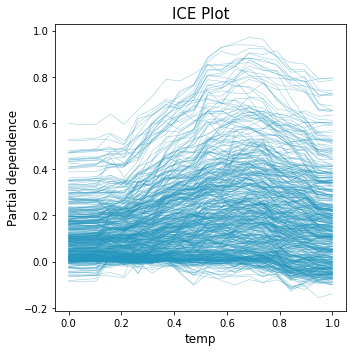

In [ ]:
# ICE
exp.model_explain(model='XGBoost', show='global_ice', uni_feature='temp', figsize=(5,5))

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

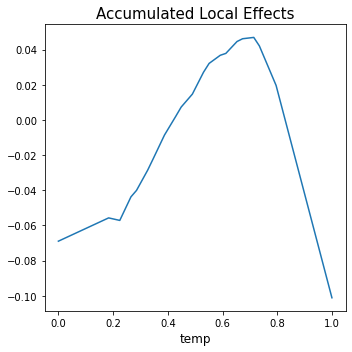

In [ ]:
# ALE
exp.model_explain(model='XGBoost', show='global_ale', uni_feature='temp', figsize=(5,5))

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

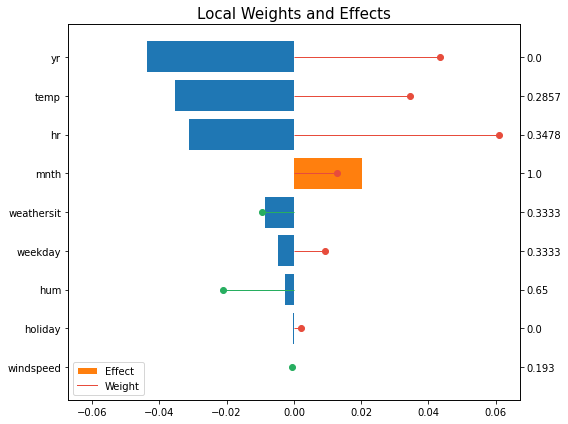

In [ ]:
# Local - LIME
exp.model_explain(model='XGBoost', show='local_lime', sample_id=1)

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

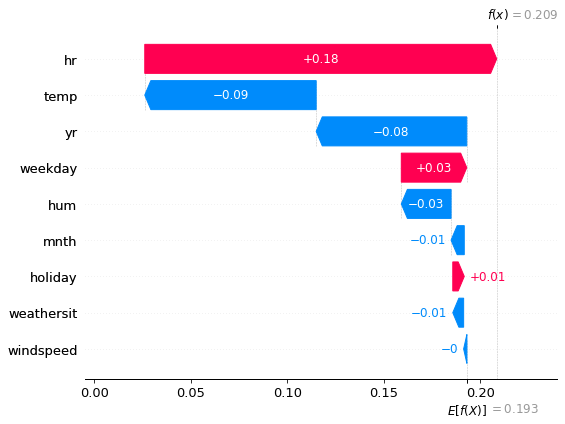

In [ ]:
# Local - SHAP (TreeSHAP)
exp.model_explain(model='XGBoost', show='local_shap', sample_id=1)

## Example 2: DNN Model

In [ ]:
from sklearn.neural_network import MLPRegressor

clf = MLPRegressor(hidden_layer_sizes=[100]*4, activation="relu", random_state=0)
pipeline = exp.make_pipeline(model=clf, name='MLP')
pipeline.fit()
exp.register(pipeline=pipeline)

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

HTML(value="<p class='notification info'>Register MLP Done</p>")

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

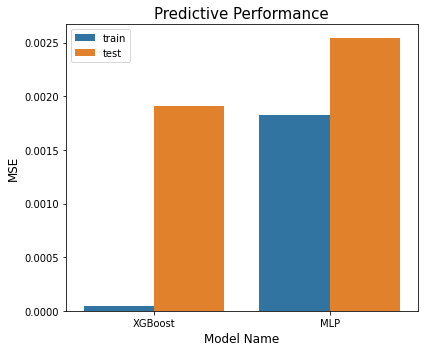

In [ ]:
# Check model performance
exp.model_compare(models=['XGBoost', 'MLP'], show="accuracy_mse", figsize=(6,5))

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

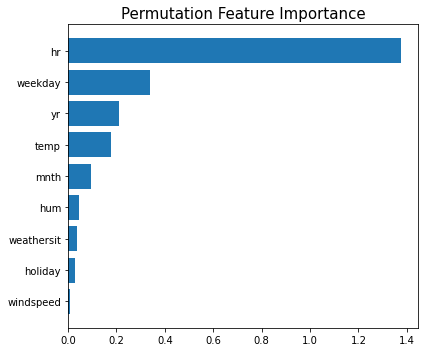

In [ ]:
# Permutation Feature Importance
exp.model_explain(model='MLP', show='global_pfi', figsize=(6,5))

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

  0%|          | 0/10 [00:00<?, ?it/s]

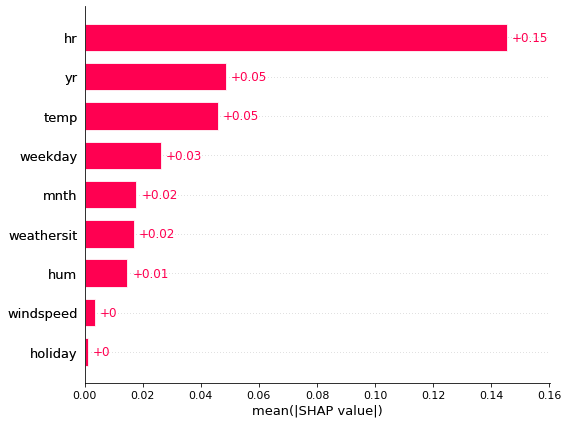

In [ ]:
# SHAP Feature Importance
exp.model_explain(model='MLP', show='global_shap_fi', sample_size=10)

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

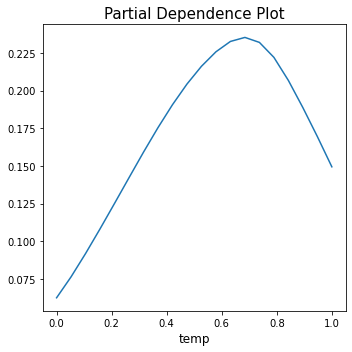

In [ ]:
# PDP 
exp.model_explain(model='MLP', show='global_pdp', uni_feature='temp', figsize=(5,5))

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

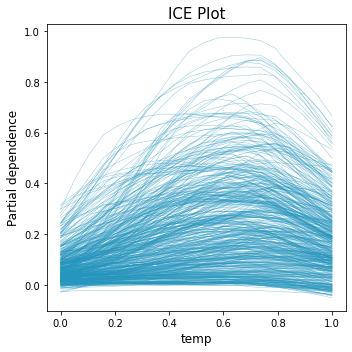

In [ ]:
# ICE
exp.model_explain(model='MLP', show='global_ice', uni_feature='temp', figsize=(5,5))

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

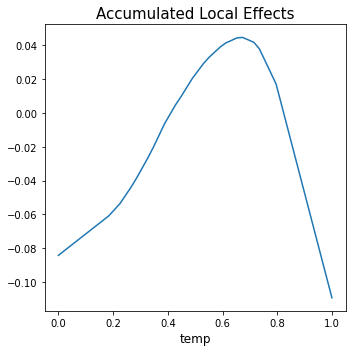

In [ ]:
# ALE 
exp.model_explain(model='MLP', show='global_ale', uni_feature='temp', figsize=(5,5))

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

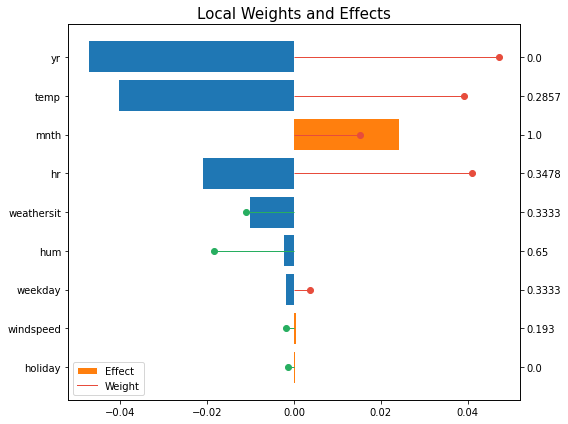

In [ ]:
# Local - LIME
exp.model_explain(model='MLP', show='local_lime', sample_id=1)

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

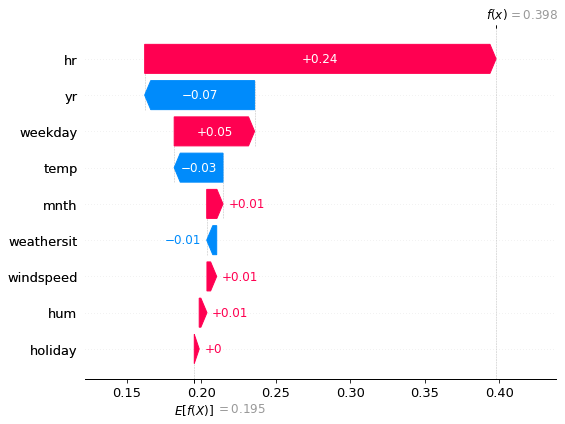

In [ ]:
# Local - LIME (KernelSHAP)
exp.model_explain(model='MLP', show='local_shap', sample_id=1)

# FANOVA-Intepretable models: GAMI-Net and EBM



In [ ]:
# Choose EBM and GAMI-Net
exp.model_train()

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

In [ ]:
# Choose EBM
exp.model_interpret()

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

In [ ]:
# Choose GAMI-Net
exp.model_interpret()

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

In [ ]:
# Choose GAMI-Net or EBM to compare Post-hoc explain results 
#   local: sample_id=0 check rank-order/mangitude
#  global: FI (weakday), Effect plots (hr, hr x weekday)
exp.model_explain()

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

# Compare/Diagnose/Explain

In [ ]:
exp.model_compare()

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

In [ ]:
exp.model_diagnose()

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

In [ ]:
exp.model_explain()

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

# Appendix - High-code Automation

## Load and Prepare Data

In [ ]:
# Choose BikeSharing  
exp.data_loader(data='BikeSharing')

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1.0,0.0,1.0,0.0,0.0,6.0,0.0,1.0,0.24,0.2879,0.81,0.0000,16.0
1,1.0,0.0,1.0,1.0,0.0,6.0,0.0,1.0,0.22,0.2727,0.80,0.0000,40.0
2,1.0,0.0,1.0,2.0,0.0,6.0,0.0,1.0,0.22,0.2727,0.80,0.0000,32.0
3,1.0,0.0,1.0,3.0,0.0,6.0,0.0,1.0,0.24,0.2879,0.75,0.0000,13.0
4,1.0,0.0,1.0,4.0,0.0,6.0,0.0,1.0,0.24,0.2879,0.75,0.0000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,1.0,1.0,12.0,19.0,0.0,1.0,1.0,2.0,0.26,0.2576,0.60,0.1642,119.0
17375,1.0,1.0,12.0,20.0,0.0,1.0,1.0,2.0,0.26,0.2576,0.60,0.1642,89.0
17376,1.0,1.0,12.0,21.0,0.0,1.0,1.0,1.0,0.26,0.2576,0.60,0.1642,90.0
17377,1.0,1.0,12.0,22.0,0.0,1.0,1.0,1.0,0.26,0.2727,0.56,0.1343,61.0


In [ ]:
# Exclude these features one-by-one: "season", "workingday", "atemp" (highly correlated with others)
exp.data_summary(feature_type={}, feature_exclude=["season", "workingday", "atemp"])

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

HTML(value='Data Shape:(17379, 13)')

In [ ]:
# exp.data_prepare() #Low-code
exp.data_prepare(target='cnt', task_type='Regression', test_ratio=0.2, random_state=0)

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

Output()

,0,1
0,Inactive columns name,"[season, workingday, atemp]"
1,Target colunm name,cnt
2,Task type,Regression
3,Test ratio,0.2
4,Random state,0


In [ ]:
# exp.eda()
exp.eda(show='all', uni_feature='temp', bi_features=['hr', 'cnt'],  multi_type='correlation_heatmap')

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

## Train Black-box Models

In [ ]:
import xgboost as xgb
clf = xgb.XGBRegressor(max_depth=7, n_estimators=500)

pipeline = exp.make_pipeline(model=clf, name='XGBoost')
pipeline.fit()
exp.register(pipeline=pipeline)

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

HTML(value="<p class='notification info'>Register XGBoost Done</p>")

In [ ]:
from sklearn.neural_network import MLPRegressor

clf = MLPRegressor(hidden_layer_sizes=[100]*4, activation="relu", random_state=0)
pipeline = exp.make_pipeline(model=clf, name='MLP')
pipeline.fit()
exp.register(pipeline=pipeline)

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

HTML(value="<p class='notification info'>Register MLP Done</p>")

## Comparison and Benchmarking

In [ ]:
exp.model_compare(models=['XGBoost', 'MLP'], show='accuracy')

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

In [ ]:
exp.model_compare(models=['XGBoost', 'MLP'], show='robustness', alpha = 0.2)

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

In [ ]:
# exp.model_compare(models=['XGBoost', 'MLP'],  show='reliability', alpha = 0.1)

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

In [ ]:
exp.model_compare(models=['XGBoost', 'MLP'], show='resilience', immu_feature='None', alpha=0.2)

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>